## Import libraries and load data

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
pd_data = pd.read_csv("winequality-red.csv", sep=";", header=0, names=cols)

pd_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [16]:
pd_data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
pd_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

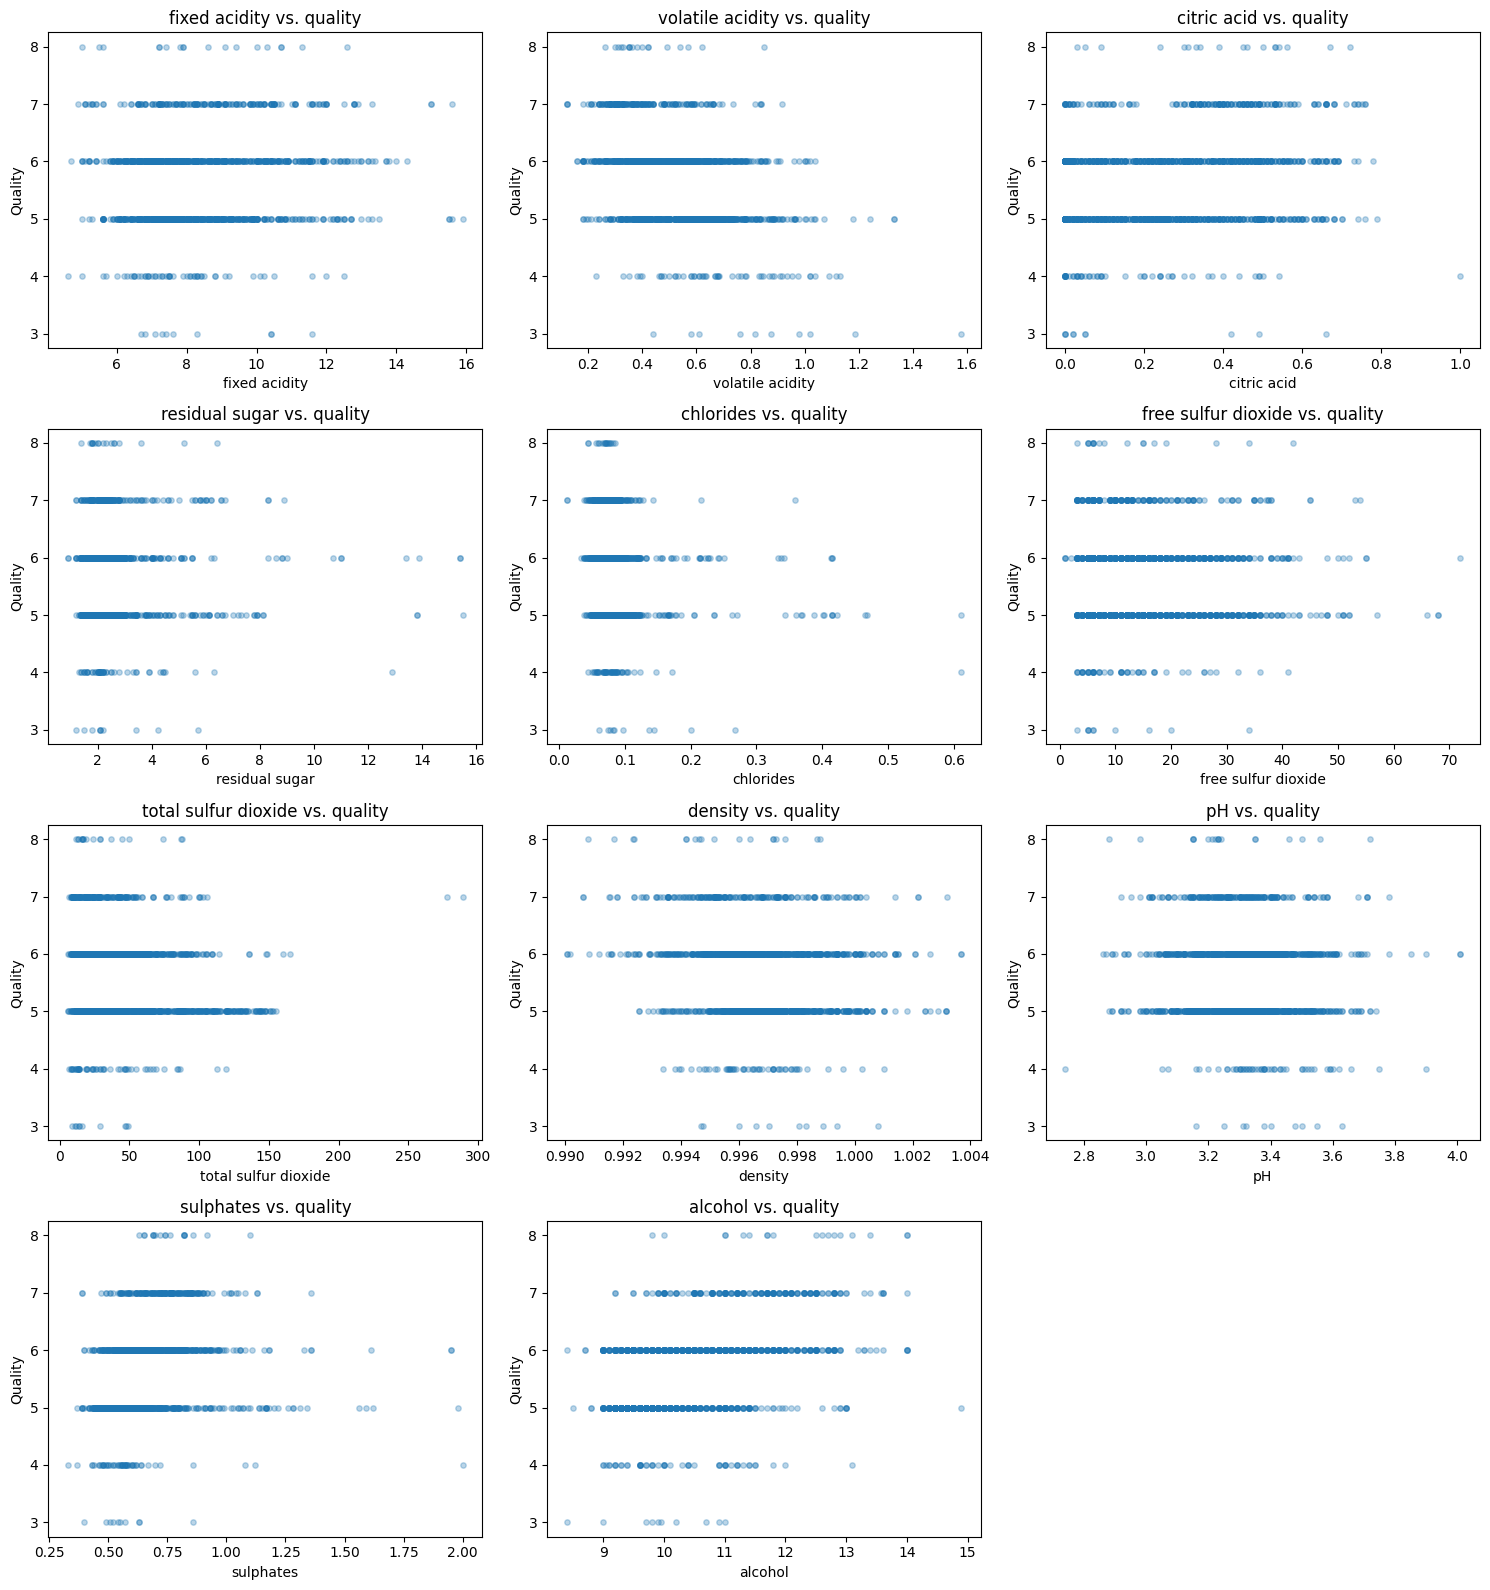

In [23]:
features = [c for c in pd_data.columns if c != "quality"]
cols = 3
rows = int(np.ceil(len(features) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for ax, feature in zip(axes.ravel(), features):
    ax.scatter(pd_data[feature], pd_data["quality"], alpha=0.3, s=15, color="#1f77b4")
    ax.set_xlabel(feature)
    ax.set_ylabel("Quality")
    ax.set_title(f"{feature} vs. quality")

for ax in axes.ravel()[len(features):]:
    ax.axis("off")

fig.tight_layout()
plt.show()

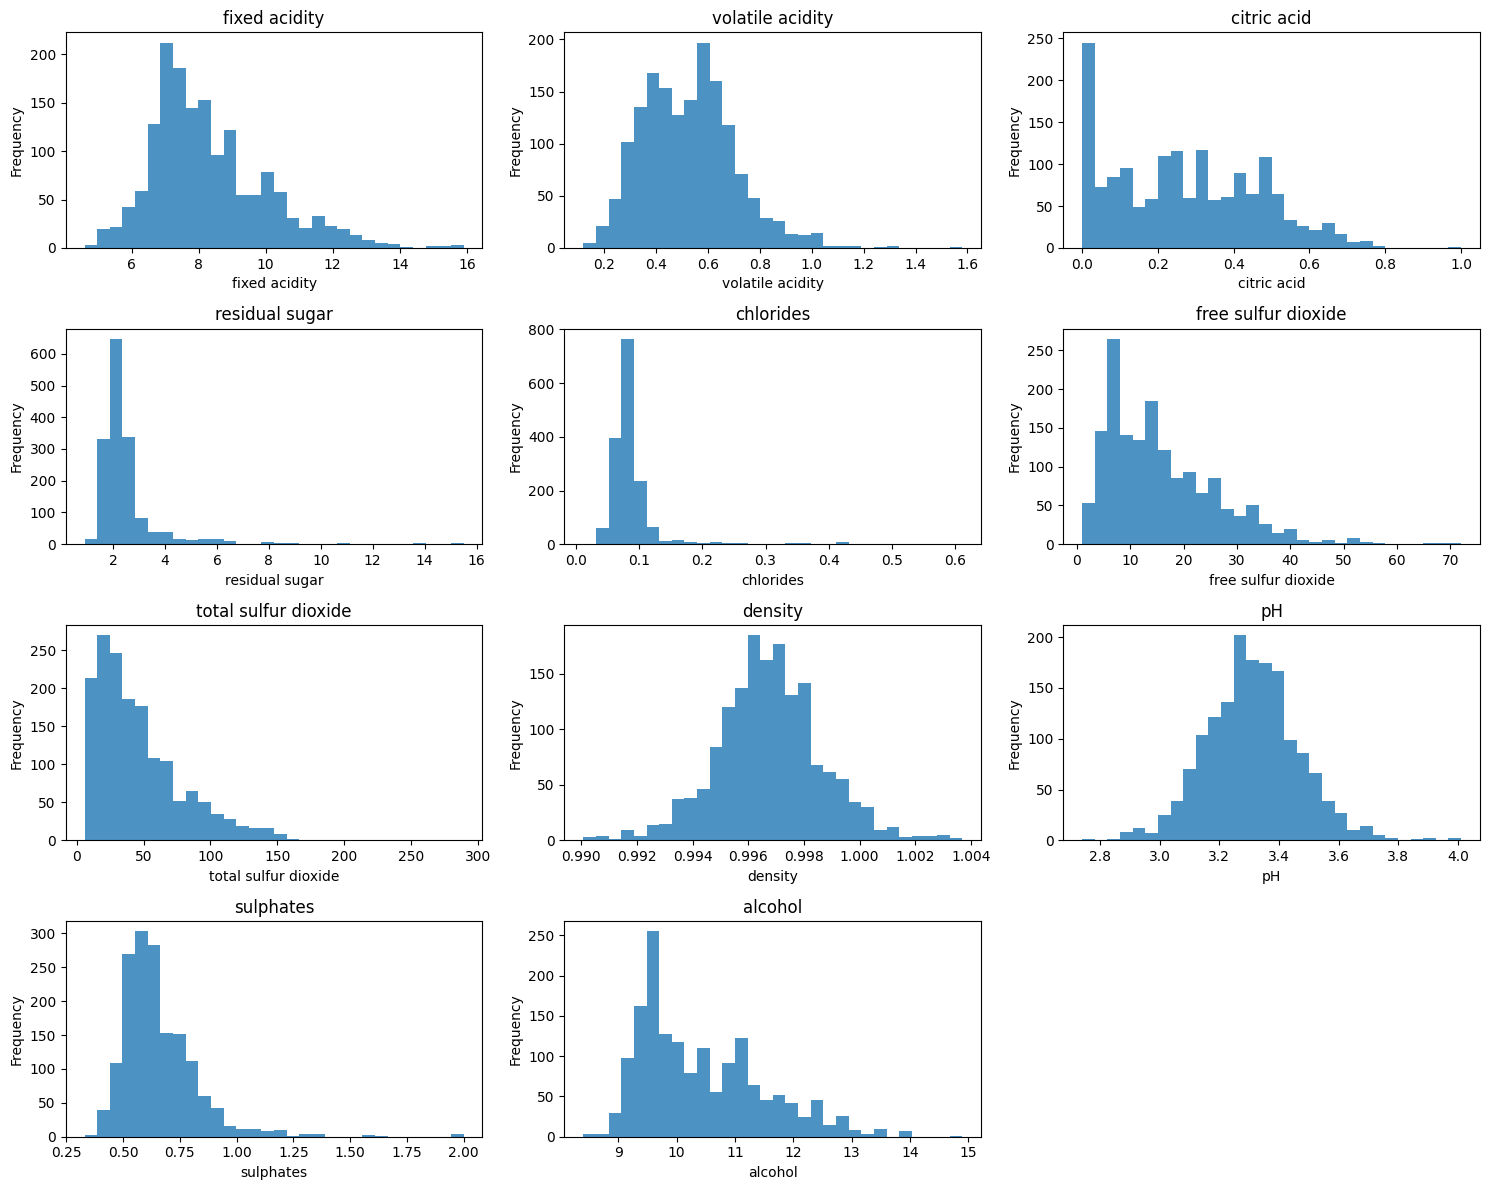

In [ ]:

def plot_feature_distributions(df, bins=30, cols=3, figsize=(15, 12), exclude=None):
    exclude = set(exclude or [])
    numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in exclude]
    if not numeric_cols:
        raise ValueError("No numeric columns available to plot.")
    
    rows = int(np.ceil(len(numeric_cols) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
    
    for ax, col in zip(axes.ravel(), numeric_cols):
        ax.hist(df[col].dropna(), bins=bins, color="#1f77b4", alpha=0.8)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
    
    # Hide any unused axes
    for ax in axes.ravel()[len(numeric_cols):]:
        ax.set_visible(False)
    
    fig.tight_layout()
    plt.show()

plot_feature_distributions(pd_data, exclude=["quality"])